<a href="https://colab.research.google.com/github/ravi-prakash1907/Predictive-Analytics/blob/main/Basics/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Cars' Dataset

_It's the implementation if_ [_this article_](https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce).  
_The dataset can be found at_ [_this link_](https://www.kaggle.com/CooperUnion/cardataset).

In [90]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
def downloadCSV(urlLoc, saveAs):
  try:
    req = requests.get(urlLoc)
    url_content = req.content
    csv_file = open(saveAs, 'wb')
    
    csv_file.write(url_content)
    csv_file.close()
  except:
    print("Can not open the URL!!")

In [92]:
!mkdir Dataset

dataURL = 'https://raw.githubusercontent.com/ravi-prakash1907/Predictive-Analytics/main/Datasets/data.csv'
localDataLoc = 'Dataset/data.csv'

## loading data
try:
  data = pd.read_csv(localDataLoc, header = 0)
  print("File was there!!")
except:
  downloadCSV(dataURL, localDataLoc)
  data = pd.read_csv(localDataLoc, header = 0)
  print("File was downloaded!!")

mkdir: cannot create directory ‘Dataset’: File exists
File was there!!


In [93]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [94]:
data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [95]:
data.shape

(11914, 16)

In [96]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [97]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [98]:
?data.rename()

In [99]:
data.rename(columns={"Engine HP" : "HP", "Engine Cylinders" : "Cylinders", "Transmission Type" : "Transmission", "Driven_Wheels" : "Drive Mode", "highway MPG" : "MPG-H", "city mpg" : "MPG-C", "MSRP" : "MRP"}, inplace=True)

In [100]:
duplicates = data[data.duplicated()]
print("{} rows have duplicate entries!".format(duplicates.shape[0]))

715 rows have duplicate entries!


In [101]:
counted = data.count()
counted

Make                11914
Model               11914
Year                11914
Engine Fuel Type    11911
HP                  11845
Cylinders           11884
Transmission        11914
Drive Mode          11914
Number of Doors     11908
Market Category      8172
Vehicle Size        11914
Vehicle Style       11914
MPG-H               11914
MPG-C               11914
Popularity          11914
MRP                 11914
dtype: int64

In [102]:
# droping duplicate entries 
data = data.drop_duplicates()
data.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,MRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [103]:
data.count()

Make                11199
Model               11199
Year                11199
Engine Fuel Type    11196
HP                  11130
Cylinders           11169
Transmission        11199
Drive Mode          11199
Number of Doors     11193
Market Category      7823
Vehicle Size        11199
Vehicle Style       11199
MPG-H               11199
MPG-C               11199
Popularity          11199
MRP                 11199
dtype: int64

In [104]:
print(data.isnull().sum())

Make                   0
Model                  0
Year                   0
Engine Fuel Type       3
HP                    69
Cylinders             30
Transmission           0
Drive Mode             0
Number of Doors        6
Market Category     3376
Vehicle Size           0
Vehicle Style          0
MPG-H                  0
MPG-C                  0
Popularity             0
MRP                    0
dtype: int64


In [105]:
## dropping NAs
data = data.dropna()
data.count()

Make                7735
Model               7735
Year                7735
Engine Fuel Type    7735
HP                  7735
Cylinders           7735
Transmission        7735
Drive Mode          7735
Number of Doors     7735
Market Category     7735
Vehicle Size        7735
Vehicle Style       7735
MPG-H               7735
MPG-C               7735
Popularity          7735
MRP                 7735
dtype: int64

In [106]:
# checking for nulls again
print(data.isnull().sum())

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Market Category     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
MRP                 0
dtype: int64


### Outlier detection

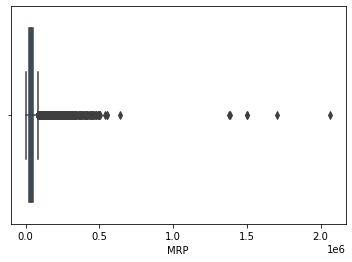

In [107]:
sns.boxplot(x=data['MRP'])

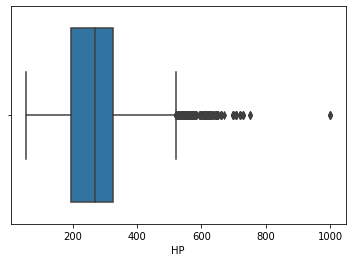

In [108]:
sns.boxplot(x=data['HP'])

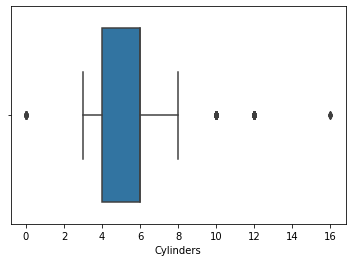

In [109]:
sns.boxplot(x=data['Cylinders'])

#### Quantile Range Check

In [110]:
firstQuantile = data.quantile(0.25)
thirdQuantile = data.quantile(0.75)

IQR = thirdQuantile - firstQuantile
print(IQR)

Year                   6.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1489.0
MRP                23252.5
dtype: float64


In [111]:
## removing outlier
data = data[~((data < (firstQuantile - 1.5 * IQR)) |(data > (thirdQuantile + 1.5 * IQR))).any(axis=1)]
data.shape

(5622, 16)

## Visualisation

### Histogram

Text(0.5, 0, 'Make')

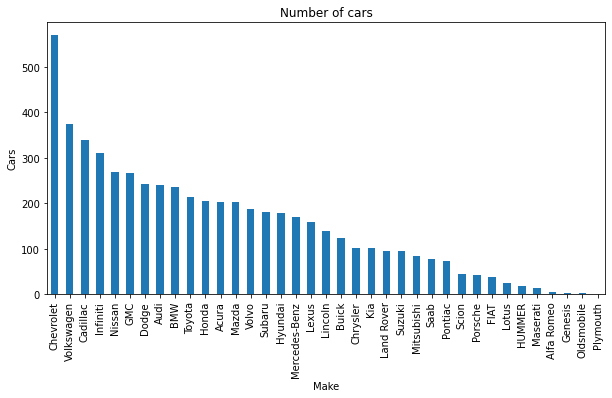

In [112]:
data.Make.value_counts().nlargest(40).plot(kind='bar',
figsize=(10,5))
plt.title("Number of cars")
plt.ylabel("Cars")
plt.xlabel("Make")

### Heat Map

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,MRP
Year,1.000000,0.151051,-0.173957,0.121819,0.344971,0.320515,0.194030,0.224195
HP,0.151051,1.000000,0.772090,-0.038800,-0.558102,-0.646821,0.089515,0.757838
Cylinders,-0.173957,0.772090,1.000000,-0.002469,-0.709868,-0.749259,0.021924,0.518301
Number of Doors,0.121819,-0.038800,-0.002469,1.000000,-0.045712,0.003745,-0.098174,0.015691
MPG-H,0.344971,-0.558102,-0.709868,-0.045712,1.000000,0.924245,0.109159,-0.308098
MPG-C,0.320515,-0.646821,-0.749259,0.003745,0.924245,1.000000,0.062135,-0.381777
Popularity,0.194030,0.089515,0.021924,-0.098174,0.109159,0.062135,1.000000,0.141315
MRP,0.224195,0.757838,0.518301,0.015691,-0.308098,-0.381777,0.141315,1.000000


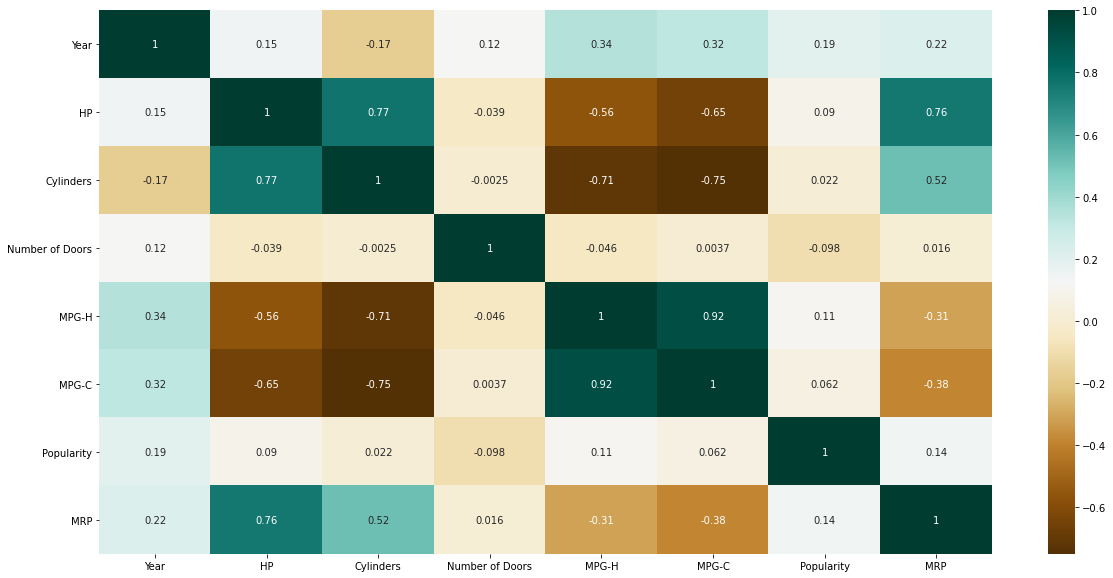

In [113]:
plt.figure(figsize=(20,10))
c = data.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

### Scatterplot

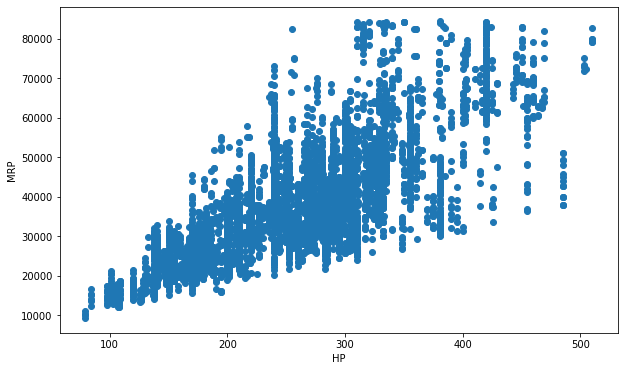

In [114]:
fig, xis = plt.subplots(figsize=(10,6))
xis.scatter(data['HP'], data['MRP'])
xis.set_xlabel('HP')
xis.set_ylabel('MRP')

plt.show()